In [ ]:
#data analysis libraries 
import pandas as pd
import numpy as np

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [ ]:
#read the dataset
dataset = pd.read_csv("train.csv")

In [ ]:
#read the first 5 lignes of the dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Data Analysis**

In [ ]:
#For very fast and better understanding, we can describe dataset and see some tips
dataset.describe(include="all")



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Rosblom, Mr. Viktor Richard",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# From the above dataset we can say that,

# There are a total of 891 passengers in our training set.
# The Age feature is missing 267 values. I'm guessing that the Age feature is pretty important to survival, so we should probably attempt to fill these gaps.
# The Cabin feature is missing 687 value approximately 77.1% of its values. Since so much of the feature is missing, it would be hard to fill in the missing values. We'll probably drop these values from our dataset.
# The Embarked feature is missing 0.22% of its values, which should be relatively harmless.

In [ ]:
#check for any other unusable values
print(pd.isnull(dataset).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
# We can see that except for the Age,Cabin and Embarked missing values, no NaN values exist.



## **Data Visualization** 

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


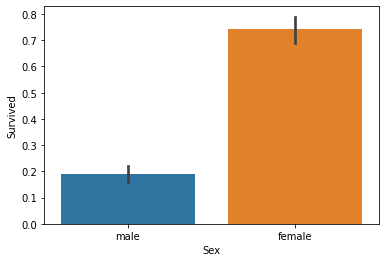

In [ ]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=dataset)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", dataset["Survived"][dataset["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", dataset["Survived"][dataset["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


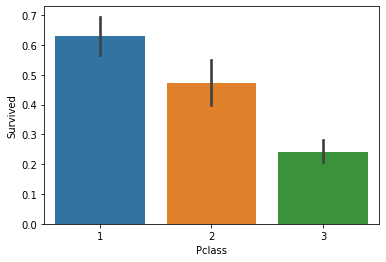

In [ ]:
#draw a bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=dataset)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", dataset["Survived"][dataset["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", dataset["Survived"][dataset["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", dataset["Survived"][dataset["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


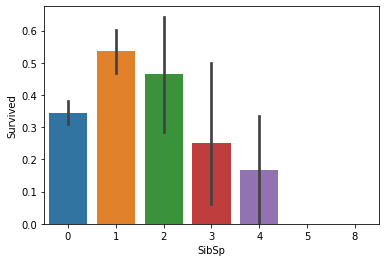

In [ ]:
#draw a bar plot for SibSp vs. survival
sns.barplot(x="SibSp", y="Survived", data=dataset)

#I won't be printing individual percent values for all of these.
print("Percentage of SibSp = 0 who survived:", dataset["Survived"][dataset["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", dataset["Survived"][dataset["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", dataset["Survived"][dataset["SibSp"] == 2].value_counts(normalize = True)[1]*100)

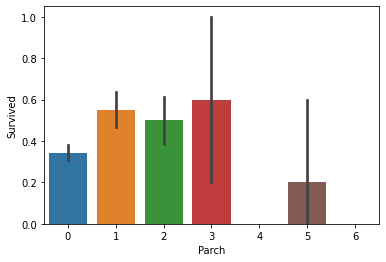

In [ ]:
#draw a bar plot for Parch vs. survival
sns.barplot(x="Parch", y="Survived", data=dataset)
plt.show()

In [ ]:
"""
with this data visualization with can conclude that :
  1-females have a much higher chance of survival than males. The Sex feature is essential in our predictions.
  2-people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)
  3-In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses 
      were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)
  4-People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those 
      with 1-3 parents or children.
  5-Babies are more likely to survive than any other age group.
  
  """

"\nwith this data visualization with can conclude that :\n  1-females have a much higher chance of survival than males. The Sex feature is essential in our predictions.\n  2-people with higher socioeconomic class had a higher rate of survival. (62.9% vs. 47.3% vs. 24.2%)\n  3-In general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses \n      were less to likely to survive than those with one or two. (34.5% vs 53.4% vs. 46.4%)\n  4-People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those \n      with 1-3 parents or children.\n  5-Babies are more likely to survive than any other age group.\n  \n  "

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## **Data Preprocessing**

In [ ]:

#Replacing the missing values in the “Age” column with the mean value
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

#Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times
print(dataset['Embarked'].mode())

#Replacing the missing values in the “Embarked” column with mode value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

#Transform gender type to int 
dataset.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
dataset = dataset.astype({"Age": np.int64})
dataset = dataset.astype({"Fare": np.int64})


0    S
dtype: object


## **Algorithms**


In [ ]:
#Setup X_train ,X_test ,Y_train and Y_test
dataset = dataset.drop(columns =['PassengerId', 'Name', 'Ticket','Cabin'])

X = dataset.drop(columns = ['Survived'],axis=1)
Y = dataset['Survived']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)



In [ ]:
#Logistic regression
clf = LogisticRegression()
clf.fit(X_train, Y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, Y_train) * 100, 2)



print (str(acc_log_reg) + ' percent')

81.04 percent


In [ ]:
#Support Vector Machines 
clf = SVC()
clf.fit(X_train, Y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_svc)

68.12


In [ ]:
#Linear SVC
clf = LinearSVC()
clf.fit(X_train, Y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_linear_svc)

48.74


In [ ]:
#k-Nearest Neighbor (KNN)
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, Y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_knn)

84.83


In [ ]:
#Decision Tree
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_decision_tree)

96.91


In [ ]:
#Random Forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_random_forest)

96.91


In [ ]:
#Perceptron
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, Y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_perceptron)

63.9


In [ ]:
#Gaussian Naive bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, Y_train) * 100, 2)


print (acc_gnb)

79.35


In [ ]:
#Stochastic Gradient Descent (SGD)
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, Y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, Y_train) * 100, 2)

print (acc_sgd)

68.68


In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines', 'Linear SVC', 
              'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 
              'Perceptron', 'Stochastic Gradient Decent'],
    
    'Score': [acc_log_reg, acc_svc, acc_linear_svc, 
              acc_knn,  acc_decision_tree, acc_random_forest, acc_gnb, 
              acc_perceptron, acc_sgd]
    })


models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,96.91
5,Random Forest,96.91
3,KNN,84.83
0,Logistic Regression,81.04
6,Naive Bayes,79.35
8,Stochastic Gradient Decent,68.68
1,Support Vector Machines,68.12
7,Perceptron,63.90
2,Linear SVC,48.74
